Import Statements

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Loading Data

Creating a small synthetic Dataset

In [2]:
data = {
    'email_text': [
        "Congratulations! You've won a free iPhone. Click here now!",
        "Meeting reminder for tomorrow at 10 AM.",
        "URGENT: Your account has been compromised. Verify your details.",
        "Hi John, please review the attached document.",
        "Free crypto coins! Limited time offer!",
        "Project update: tasks completed and next steps.",
        "Claim your prize! Enter our lottery for a chance to win.",
        "Regarding the report you submitted yesterday.",
        "VIAGRA, CIALIS, and more! Best prices.",
        "Can we reschedule our call to next week?",
        "Earn easy money from home! Work at your own pace.",
        "Hello team, here are the minutes from our last meeting.",
        "Unsubscribe from our mailing list here.",
        "Your Amazon order has shipped.",
        "Special offer: 50% off all products for a limited time!",
        "Please find the budget proposal attached."
    ],
    'label': [
        'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham'
    ]
}

In [3]:
df = pd.DataFrame(data)
print("Dataset Head:")
print(df.head())
print("\nLabel Distribution:")
print(df['label'].value_counts())

Dataset Head:
                                          email_text label
0  Congratulations! You've won a free iPhone. Cli...  spam
1            Meeting reminder for tomorrow at 10 AM.   ham
2  URGENT: Your account has been compromised. Ver...  spam
3      Hi John, please review the attached document.   ham
4             Free crypto coins! Limited time offer!  spam

Label Distribution:
label
spam    8
ham     8
Name: count, dtype: int64


Pre-processing Data

In [4]:
# Convert labels to numerical format (0 for ham, 1 for spam)
df['label_encoded'] = df['label'].apply(lambda x: 1 if x == 'spam' else 0)

# Split data into training and testing sets
X = df['email_text']
y = df['label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000) # Limit features for simplicity

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"\nShape of X_train_tfidf: {X_train_tfidf.shape}")
print(f"Shape of X_test_tfidf: {X_test_tfidf.shape}")


Training set size: 12
Testing set size: 4

Shape of X_train_tfidf: (12, 51)
Shape of X_test_tfidf: (4, 51)


Model Training

In [5]:
# Initialize the Multinomial Naive Bayes model
model = MultinomialNB()

# Train the model
model.fit(X_train_tfidf, y_train)

print("\nModel training complete.")


Model training complete.


Evaluating The Model


Model Evaluation:
Accuracy: 0.5000
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000


c:\Users\SOUVIK DUTTA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


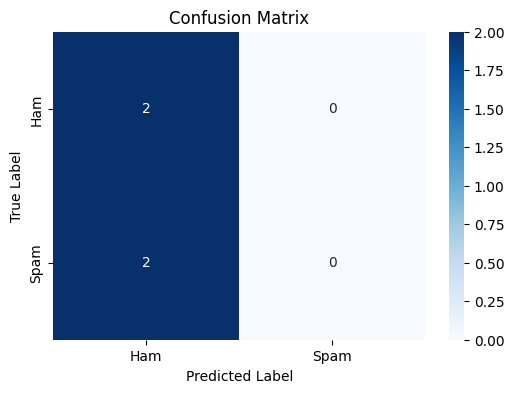


Classification Report:
              precision    recall  f1-score   support

         Ham       0.50      1.00      0.67         2
        Spam       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



c:\Users\SOUVIK DUTTA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\SOUVIK DUTTA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\SOUVIK DUTTA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

In [6]:
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report (more detailed view)
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

Making Predictions on New Data

In [7]:
def predict_spam(email_text):
    # Transform the new email text using the trained TF-IDF vectorizer
    email_tfidf = tfidf_vectorizer.transform([email_text])
    # Make prediction
    prediction = model.predict(email_tfidf)
    # Return 'spam' or 'ham'
    return "spam" if prediction[0] == 1 else "ham"

# Test cases
new_emails = [
    "Hello team, the Q3 report is ready for review.",
    "WIN A FREE VACATION NOW! Click the link.",
    "Your parcel has been delivered. Track here.",
    "Attention: Important security update for your bank account.",
    "Congratulations! You've been selected for a special offer."
]

print("\nPredictions on new emails:")
for email in new_emails:
    prediction = predict_spam(email)
    print(f"Email: '{email}'\nPrediction: {prediction}\n")


Predictions on new emails:
Email: 'Hello team, the Q3 report is ready for review.'
Prediction: ham

Email: 'WIN A FREE VACATION NOW! Click the link.'
Prediction: spam

Email: 'Your parcel has been delivered. Track here.'
Prediction: ham

Email: 'Attention: Important security update for your bank account.'
Prediction: ham

Email: 'Congratulations! You've been selected for a special offer.'
Prediction: spam

